In [1]:
##############################################################################
################################### PART I ###################################
##############################################################################

In [2]:
################################
##### 1.1 p-ER random graph ####
################################

import random
import numpy as np
import networkx as nx 


def create_graph(n):
    '''
    Creates a dictionary structure for n nodes {}
    :param n: number of nodes
    :return: something like {1: [2,3], 2: [1,3], ..., n: [1,3]}
    '''
    g = dict()
    for i in range(n):
        g[i] = []
    return g

def er_graph(p, n):
    '''
    Create a graph of the ER type
    :param g: graph of the type {1: [2,3], 2: [1,3], ..., n: [1,3]}
    :param p: probability of creating a link
    :return: g modified
    '''
    # create the nodes
    g = create_graph(n)
    for i in g:
        for j in g:
            if j > i:
                r = random.uniform(0, 1)
                if r < p:
                    g[i].append(j)
                    g[j].append(i)
    return g

def graph_to_matrix(g):

    '''
    Converts the graph g into a matrix m
    :param g: graph of the type {1: [2,3], 2: [1,3], ..., n: [1,3]}
    :return: m
    '''
    n = len(g)
    m = np.zeros((n, n))
    for i in g:
        l = g[i]
        for j in l:
            m[i,j] = 1
    return m

{0: [4, 5, 6, 9], 1: [2, 6, 9], 2: [1, 3], 3: [2, 4, 5, 7, 8], 4: [0, 3, 5, 6, 7, 8], 5: [0, 3, 4, 6, 7, 8, 9], 6: [0, 1, 4, 5, 9], 7: [3, 4, 5, 8, 9], 8: [3, 4, 5, 7], 9: [0, 1, 5, 6, 7]}


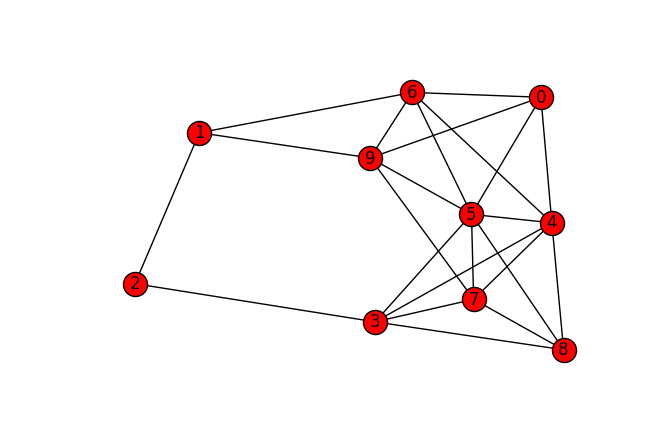

In [3]:
# Example: connect randomly the graph as ER

g_er = er_graph(p = 0.5, n = 10)
print(g_er)
a=graph_to_matrix(g_er)
G=nx.from_numpy_matrix(np.array(a))
nx.draw(G,with_labels=True)
import matplotlib.pyplot as plt
plt.show()

In [4]:
######################################
##### 1.2. r-regular random graph ####
######################################

import random
import copy


def checkCount(dic, r, x):
    if dic[x] != (r):
        return False
    else:
        return True


def finalCheck(dic, n, r):
    for p in range(0, n):
        if dic[p] != (r):
            return False
    return True


def regular_graph(n, r):
    s = 0

    myDict = {}
    count = {}

    disconnected = []

    n = int(n)  # nodes
    r = int(r)  # edges
    l = 0
    found = 0
    done = 0
    x = []

    while found != 1:

        l = 0
        myDict.clear()
        count.clear()
        disconnected[:] = []
        done = 0

        for a in range(0, n):
            myDict[a] = copy.copy(x)
            count[a] = 0
            disconnected.append(a)

        for i in range(0, r):
            for j in range(0, n):
                s = 0
                l = 0
                change = 0

                while s == 0 and l != (n * r):
                    v = int(random.uniform(0, n))

                    if (v != j) and (v not in myDict[j]) and (count[v] < r) and (count[j] < r):

                        if len(disconnected) == 1 and done == 0 and disconnected[0] != j:
                            v = disconnected[0]
                            done = 1

                        myDict[j].append(v)
                        myDict[v].append(j)
                        count[v] += 1
                        count[j] += 1

                        if v in disconnected:
                            disconnected.remove(v)
                        if j in disconnected:
                            disconnected.remove(j)

                        s = 1

                    elif (checkCount(count, r, j)):
                        s = 1

                    prev = myDict
                    l += 1

        if finalCheck(count, n, r):
            found = 1

    return (myDict)

{0: [6, 9], 1: [9, 3], 2: [8, 4], 3: [5, 1], 4: [8, 2], 5: [3, 7], 6: [0, 7], 7: [5, 6], 8: [2, 4], 9: [1, 0]}


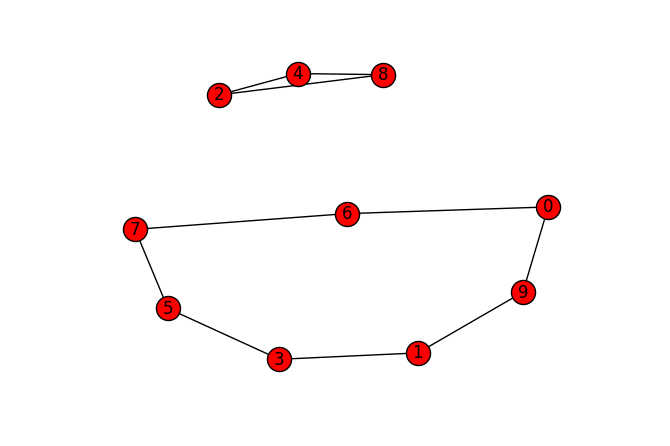

In [8]:
# Example: regular graph

g_reg = regular_graph(10, 2)
print(g_reg)
a=graph_to_matrix(g_reg)
G=nx.from_numpy_matrix(np.array(a))
nx.draw(G,with_labels=True)
plt.show()

In [9]:
######################################
##### 1.3 Connectivity check #########
######################################

In [10]:

######################################
##### 1.3.1 Irreducibility ###########
######################################

import numpy as np
from numpy import linalg as LA
def connectivityIrr(A):
    '''
        Check the connectivity of a graph 
        :param A: adjacency matrix (nxn)
        :return: True if The adjacency matrix is irreducible (the graph is connected), False if not
        '''
    I=np.identity(len(A))
    for i in range(1, len(A)):
       I+= LA.matrix_power(A,i)
    if (I>0).all():
        return True
        #print(' The adjacency matrix is irreducible,the graph is connected')
    else:
        return False
        #print(' The adjacency matrix is not irreducible,the graph is not connected')


In [11]:
# Example:

a_er=graph_to_matrix(g_er)
print("Connection of this p-ER random graph:",connectivityIrr(a_er))

a_reg=graph_to_matrix(g_reg)
print("Connection of this r-regular random graph:",connectivityIrr(a_reg))

Connection of this p-ER random graph: True
Connection of this r-regular random graph: False


In [12]:

##########################################################
##### 1.3.2 Eigenvalue of the Laplacian matrix ###########
##########################################################

# create the D matrix

def matrix_d(g):
    '''
    Given a graph g return the matrix D
    :param g:  graph of the type {1: [2,3], 2: [1,3], ..., n: [1,3]}
    :return: the matrix D
    '''
    n = len(g)
    m = np.zeros((n, n))
    for i in g:
        m[i,i] = len(g[i])
    return m

def matrix_L(g):
    '''
    Create the L = D - G matrix
    :param g:
    :return:
    '''
    return (matrix_d(g)-graph_to_matrix(g))

def eigenvalues_connected(L):
    '''
    Checks if the second eigenvalue of L is positive and therefore connected (True) or not connected (False)
    :param L:
    :return: True if connected or False if not connected
    '''
    eigenvalues = np.linalg.eigvals(L)
    second_smallest = sorted(eigenvalues)[1]
    if second_smallest > 0.00000001:
        return True
    else:
        return False

In [13]:
#Example:

#get the matrix L
L_er = matrix_L(g_er)
L_reg = matrix_L(g_reg)

print("Connection of this p-ER random graph:",eigenvalues_connected(L_er))
print("Connection of this r-regular random graph:",eigenvalues_connected(L_reg))

Connection of this p-ER random graph: True
Connection of this r-regular random graph: False


In [14]:

##########################################################
##### 1.3.3 Breadth-First search algorithm ###############
##########################################################

def bfs(g,node):
    '''
    :param g: graph of the type {1: [2,3], 2: [1,3], ..., n: [1,3]}
    :param node: a given node from which I want to verify the connection
    :return: True if the graph is connected, False otherwise
    '''
    Q=[node]
    S=[]
    S.append(node)
    while len(Q)!=0:
        current=Q.pop()
        for i in g[current]:
            if i not in S:
                Q.append(i)
                S.append(i)
    if len(S)!=len(g):
        connection=False
    else:
        connection=True
    return(connection)

In [15]:
#Example:

print("Connection of this p-ER random graph:",bfs(g_er,4))
print("Connection of this r-regular random graph:",bfs(g_reg,4))

Connection of this p-ER random graph: True
Connection of this r-regular random graph: False


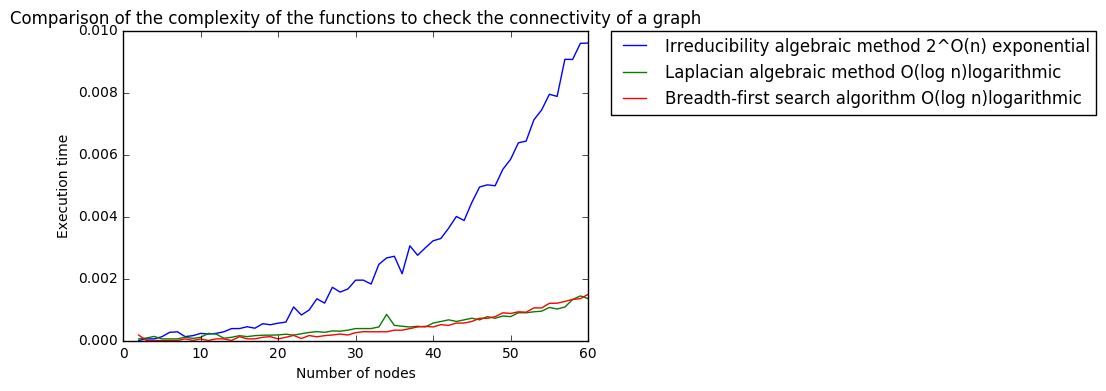

In [17]:
############################################################################################
##### 1.4 Comparison of the complexity as a function of n of the different methods #########
############################################################################################

import matplotlib.pyplot as plt
import time

random.seed(64)
#to compute the mean time  that the fuction to check the connectivity with the irreducibility algebraic method takes,depending on the number of nodes a a graph
tot = []
for i in range(2,61):
    random.seed(64)
    g = er_graph(0.5, i)
    a = graph_to_matrix(g)
    times = []
    for j in range(301):
        start = time.time()
        connectivityIrr(a)
        end = time.time()
        times.append( end - start)
    tot.append(np.mean(times))

#print(tot)
#to compute the mean time  that the fuction to check the connectivity with the laplacian algebraic method takes,depending on the number of nodes a a graph
totl=[]
for i in range(2,61):
    random.seed(64)
    g = er_graph(0.5, i)
    L=matrix_L(g)
    times = []
    for j in range(301):
        start = time.time()
        eigenvalues_connected(L)
        end = time.time()
        times.append(end - start)
    totl.append( np.mean(times))

#print(tot)

#to compute the mean time  that the fuction to check the connectivity with the breadth-first search algorithm takes,depending on the number of nodes a a graph
totb=[]
for i in range(2,61):
    random.seed(64)
    g = er_graph(0.5, i)
    times = []
    for j in range(301):
        start = time.time()
        bfs(g,np.random.randint(1,i))
        end = time.time()
        times.append(end - start)
    totb.append( np.mean(times))

#print(totb)
plt.title('Comparison of the complexity of the functions to check the connectivity of a graph')
plt.ylabel('Execution time')
plt.xlabel('Number of nodes')
plt.plot(range(2,61),tot,label='Irreducibility algebraic method 2^O(n) exponential')
plt.plot(range(2,61),totl,label='Laplacian algebraic method O(log n)logarithmic')
plt.plot(range(2,61),totb,label='Breadth-first search algorithm O(log n)logarithmic')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [18]:
############################################################################################
##### 1.5 Probability that a graph G is connected: plots ###################################
############################################################################################

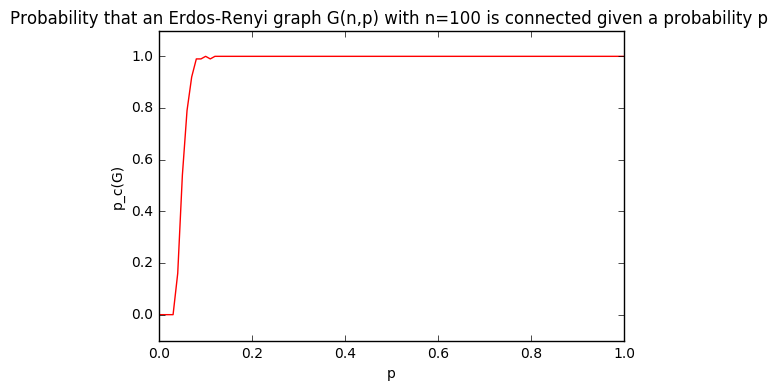

In [19]:
################################################################################################################
##### 1.5.1 Probability that an Erdos-Renyi graph G(n,p) with n=100 is connected given a probability p #########
################################################################################################################

N=100
prob=np.arange(0,1.01,0.01)
l=[]
for p in prob:
    con = 0
    for i in range(1,N+1):
        g=er_graph(p = p, n = 100 )
        #m = graph_to_matrix(g)
        L = matrix_L(g)
        c = eigenvalues_connected(L)
        if c==True:
            con=con+1
    l.append(con/N)
    
plt.title('Probability that an Erdos-Renyi graph G(n,p) with n=100 is connected given a probability p ')
plt.ylabel('p_c(G)')
plt.xlabel('p')
plt.plot(prob, l, 'r-')
plt.axis([0, 1, -0.1, 1.1])
plt.show()

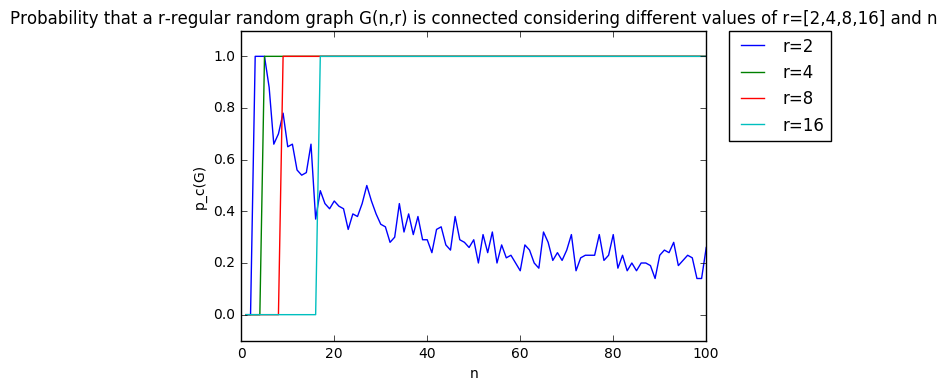

In [22]:
########################################################################################################################
#1.5.2 Probability that a r-regular random graph G(n,r) is connected considering different values of r=[2,4,8,16] and n 
########################################################################################################################
import matplotlib.pyplot as plt
N=100
n_values=np.arange(1,101,1)
r_values=[2,4,8,16]
l=[]
for r in r_values:
    for n in n_values:
        con = 0
        if n>r and (n*r%2)==0:
            for i in range(1,N+1):
                g=regular_graph(n=n,r=r)
                c = bfs(g,1)
                if c==True:
                    con=con+1
        l.append(con/N)

a=l[0:100]
b=l[100:200]
c=l[200:300]
d=l[300:400]

plt.title('Probability that a r-regular random graph G(n,r) is connected considering different values of r=[2,4,8,16] and n')
plt.ylabel('p_c(G)')
plt.xlabel('n')

plt.plot(n_values,a,label='r=2')
plt.plot(n_values,b,label='r=4')
plt.plot(n_values,c,label='r=8')
plt.plot(n_values,d,label='r=16')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.axis([0, 100, -0.1, 1.1])
plt.show()

In [23]:
###############################################################################
################################### PART II ###################################
###############################################################################

In [24]:
#################################
##### 2.1 Shortest path #########
#################################


# Priority dictionary using binary heaps
# David Eppstein, UC Irvine, 8 Mar 2002

# Implements a data structure that acts almost like a dictionary, with two modifications:
# (1) D.smallest() returns the value x minimizing D[x].  For this to work correctly,
#        all values D[x] stored in the dictionary must be comparable.
# (2) iterating "for x in D" finds and removes the items from D in sorted order.
#        Each item is not removed until the next item is requested, so D[x] will still
#        return a useful value until the next iteration of the for-loop.
# Each operation takes logarithmic amortized time.

from __future__ import generators


class priorityDictionary(dict):
    def __init__(self):
        '''Initialize priorityDictionary by creating binary heap of pairs (value,key).
Note that changing or removing a dict entry will not remove the old pair from the heap
until it is found by smallest() or until the heap is rebuilt.'''
        self.__heap = []
        dict.__init__(self)

    def smallest(self):
        '''Find smallest item after removing deleted items from front of heap.'''
        if len(self) == 0:
            raise IndexError("smallest of empty priorityDictionary")
        heap = self.__heap
        while heap[0][1] not in self or self[heap[0][1]] != heap[0][0]:
            lastItem = heap.pop()
            insertionPoint = 0
            while 1:
                smallChild = 2 * insertionPoint + 1
                if smallChild + 1 < len(heap) and heap[smallChild] > heap[smallChild + 1]:
                    smallChild += 1
                if smallChild >= len(heap) or lastItem <= heap[smallChild]:
                    heap[insertionPoint] = lastItem
                    break
                heap[insertionPoint] = heap[smallChild]
                insertionPoint = smallChild
        return heap[0][1]

    def __iter__(self):
        '''Create destructive sorted iterator of priorityDictionary.'''

        def iterfn():
            while len(self) > 0:
                x = self.smallest()
                yield x
                del self[x]

        return iterfn()

    def __setitem__(self, key, val):
        '''Change value stored in dictionary and add corresponding pair to heap.
Rebuilds the heap if the number of deleted items gets large, to avoid memory leakage.'''
        dict.__setitem__(self, key, val)
        heap = self.__heap
        if len(heap) > 2 * len(self):
            self.__heap = [(v, k) for k, v in self.iteritems()]
            self.__heap.sort()  # builtin sort probably faster than O(n)-time heapify
        else:
            newPair = (val, key)
            insertionPoint = len(heap)
            heap.append(None)
            while insertionPoint > 0 and newPair < heap[(insertionPoint - 1) // 2]:
                heap[insertionPoint] = heap[(insertionPoint - 1) // 2]
                insertionPoint = (insertionPoint - 1) // 2
            heap[insertionPoint] = newPair

    def setdefault(self, key, val):
        '''Reimplement setdefault to pass through our customized __setitem__.'''
        if key not in self:
            self[key] = val
        return self[key]

In [25]:
# Dijkstra's algorithm for shortest paths
# David Eppstein, UC Irvine, 4 April 2002
# Modified by Sergio Ballesteros

# http://aspn.activestate.com/ASPN/Cookbook/Python/Recipe/117228

def Dijkstra(G, start, end=None):
    """
    Find shortest paths from the start vertex to all
    vertices nearer than or equal to the end.

    The input graph G is assumed to have the following
    representation: A vertex can be any object that can
    be used as an index into a dictionary.  G is a
    dictionary, indexed by vertices.  For any vertex v,
    G[v] is itself a dictionary, indexed by the neighbors
    of v.  For any edge v->w, G[v][w] is the length of
    the edge.  This is related to the representation in
    <http://www.python.org/doc/essays/graphs.html>
    where Guido van Rossum suggests representing graphs
    as dictionaries mapping vertices to lists of neighbors,
    however dictionaries of edges have many advantages
    over lists: they can store extra information (here,
    the lengths), they support fast existence tests,
    and they allow easy modification of the graph by edge
    insertion and removal.  Such modifications are not
    needed here but are important in other graph algorithms.
    Since dictionaries obey iterator protocol, a graph
    represented as described here could be handed without
    modification to an algorithm using Guido's representation.

    Of course, G and G[v] need not be Python dict objects;
    they can be any other object that obeys dict protocol,
    for instance a wrapper in which vertices are URLs
    and a call to G[v] loads the web page and finds its links.

    The output is a pair (D,P) where D[v] is the distance
    from start to v and P[v] is the predecessor of v along
    the shortest path from s to v.

    Dijkstra's algorithm is only guaranteed to work correctly
    when all edge lengths are positive. This code does not
    verify this property for all edges (only the edges seen
     before the end vertex is reached), but will correctly
    compute shortest paths even for some graphs with negative
    edges, and will raise an exception if it discovers that
    a negative edge has caused it to make a mistake.
    """

    D = {}  # dictionary of final distances
    P = {}  # dictionary of predecessors
    Q = priorityDictionary()  # est.dist. of non-final vert.
    Q[start] = 0

    for v in Q:
        D[v] = Q[v]
        if v == end: break

        for w in G[v]:
            vwLength = D[v] + G[v][w]
            if w in D:
                if vwLength < D[w]:
                    raise ValueError("Dijkstra: found better path to already-final vertex")
            elif w not in Q or vwLength < Q[w]:
                Q[w] = vwLength
                P[w] = v

    return (D, P)


def shortestPath(G, start, end):
    """
    Find a single shortest path from the given start vertex
    to the given end vertex.
    The input has the same conventions as Dijkstra().
    The output is a list of the vertices in order along
    the shortest path.
    """

    D, P = Dijkstra(G, start, end)

    Path = []
    while 1:
        Path.append(end)
        if end == start: break
        try:
            end = P[end]
        except KeyError:
            return False
    Path.reverse()
    return Path




In [26]:
import copy

# Delete nodes
def delete_nodes(gd, path):
    '''
    Deletes the intermidiete nodes in the path from the weighted graph
    :param gd: weighted graph
    :param path: path output in list form
    :return: gd modified without the nodes
    '''
    gd_copy = dict.copy(gd)
    delete_this = path[1:-1]
    # Delete the nodes
    for node in gd:
        if node in delete_this:
            del(gd_copy[node])

    # Update the original gd
    del(gd)
    gd = dict.copy(gd_copy)

    # Delete the edges
    for node in list(gd):
        for link in list(gd[node]):
            if link in delete_this:
                del(gd_copy[node][link])

    return gd_copy


def delete_link(gd, node1, node2):
    del(gd[node1][node2])
    del(gd[node2][node1])
    return gd
# Convert g to the format of the library used
def convert_to_dij(g):
    '''
    Conver the graph g to a graph that is weigthed
    :param g: graph
    :return:
    '''
    dic = {}
    for node in g:
        dic[node] = {node2: 1 for node2 in g[node]}

    return dic

def dif_size(caminos, path):
    if path is False:
        return True
    if len(caminos) is 0:
        size = 1000
    else:
        size = len(caminos[0])
    if size < len(path):
        return True
    else:
        return False


def short_path(g, l, node1, node2):
    gd = convert_to_dij(g)
    caminos = []
    coun = 0
    while 1:
        path = shortestPath(gd, node1, node2)
        #print(path)
        # Pop the nodes
        if path is not False and dif_size(caminos, path) is False:
            caminos.append(path[:])
            coun = coun + 1
            if len(path) > 2:
                #if the path has more than 2 nodes (node1 and node2) then remove them
                gd = delete_nodes(gd, path)
            else:
                # This is when the link from node1 to node 2 is direct and we must remove
                # it so the program works
                delete_link(gd, node1, node2)

        if path is False or coun is l or dif_size(caminos, path) is True:
            # No more paths or we found l shortest paths
            return caminos

'''
# how to use it:
# first create a graph, for example a ER-graph with the parameters recomended
n = 100
p = 8/(n-1)
g = er_graph(p=p, n=n)
# Now to find the l paths run with your desired parameters this:
paths = short_path(g, l=4, node1=0, node2=n-1)
# Where g is the graph generated from er_graph(), l is the maximum number of shortest paths,
# node1 is the node from the begining and node2 is the end node
# Now we print the paths, and gives a list of lists (paths)
# i.e from 0 to 99 we can get this result: [[0, 27, 12, 99], [0, 20, 16, 99], [0, 70, 23, 99], [0, 68, 47, 99]]
print(paths)
# If we set l = 4 but there are only 3 disjoint paths, the output will be a list of 3 lists
'''


'\n# how to use it:\n# first create a graph, for example a ER-graph with the parameters recomended\nn = 100\np = 8/(n-1)\ng = er_graph(p=p, n=n)\n# Now to find the l paths run with your desired parameters this:\npaths = short_path(g, l=4, node1=0, node2=n-1)\n# Where g is the graph generated from er_graph(), l is the maximum number of shortest paths,\n# node1 is the node from the begining and node2 is the end node\n# Now we print the paths, and gives a list of lists (paths)\n# i.e from 0 to 99 we can get this result: [[0, 27, 12, 99], [0, 20, 16, 99], [0, 70, 23, 99], [0, 68, 47, 99]]\nprint(paths)\n# If we set l = 4 but there are only 3 disjoint paths, the output will be a list of 3 lists\n'

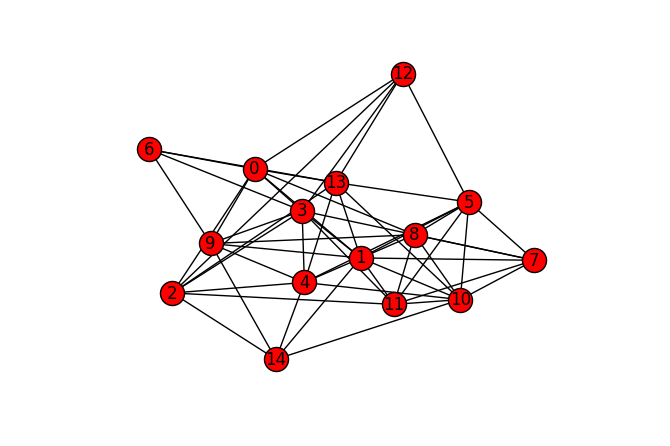

[[0, 1, 14], [0, 2, 14], [0, 9, 14]]


In [33]:
#Example:

n = 15
p = 8/(n-1)
g = er_graph(p=p, n=n)
a=graph_to_matrix(g)
G=nx.from_numpy_matrix(np.array(a))
nx.draw(G,with_labels=True)
plt.show()
paths = short_path(g, l=4, node1=0, node2=n-1)
print(paths)

In [35]:
##########################################
##### 2.2 Throughput performance #########
##########################################

# g must be a dictionary containing nodes and edges between the nodes, the function will return Throughput/C
def Throughput(g):
    mat = []
    counter = 0
    maximum = 0
    n = len(g)

    for i in range(0, n):
        for j in range(0, n):
            if i != j:
                row = []
                row.append(i)
                row.append(j)
                paths = short_path(g, l=50, node1=i, node2=j)
                row.append(paths)
                row.append(len(paths))
                mat.append(row)

    for i in range(0, n):
        for j in range(0, n):
            if i != j:
                b = [i, j]
                l = 0.0
                for k in range(0, n):
                    found = 0
                    for m in range(0, len(mat[k][2])):
                        a = mat[k][2][m]
                        for p in range(len(a)):
                            if a[p:p + len(b)] == b:
                                found = 1
                                if mat[k][3] != 0:
                                  l = l + (1 / mat[k][3])

                mat[counter].append(l)
                counter += 1

                if l > maximum:
                    maximum = l
    if maximum != 0:
        return 1 / maximum
    else:
        return 0

In [36]:
#Example:
g=er_graph(p = 8/10-1, n = 10)
print(Throughput(g))

1


In [ ]:
###########################################
##### 2.3 Reliability performance #########
###########################################

from random import uniform
import matplotlib.pyplot as plt
import numpy


def meanz(*a):
    sums = []
    sm = 0

    for i in range(len(a[0][0])):
        sm = 0
        for j in range(len(a[0])):
            sm = sm + a[0][j][i]
        sums.append(sm)

    for k in range(len(sums)):
        sums[k] = sums[k] / len(a[0])
    return sums

def means(*a):
    arr = numpy.array(a)
    arr = numpy.mean(arr, axis=1)
    return arr[0]

def standDev(*a):
    arr = numpy.array(a)
    arr = numpy.std(arr, axis=1)
    return arr[0]


# we write a function that remove links from the adjacency matrix of a graph, given the probability that a link can break down
def lb(a, p):
    '''
       :param a: adjacency matrix (nxn)
       :param p: probability of  a link break down
       :return: a modified
       '''
    for i in range(len(a)):
        for j in range(len(a)):
            r = uniform(0, 1)
            if a[i, j] == 1:
                if r < p:
                    a[i, j] = 0
                    a[j, i] = 0
    return a


# we write a function that converts an adjacency matrix(a) into a graph(dictionary)
def matrix_to_graph(a):
    g = {}
    for i in range(len(a)):
        g[i] = []
        for j in range(len(a)):
            if a[i, j] == 1:
                if i in g:
                    g[i].append(j)
                else:
                    g[i] = [j]

    return g



fin_th = []
fin_er = []
find_th = [] #to store standard deviation
find_er = [] #to store standard deviation
finm_th = [] #to store mean
finm_er = [] #to store mean
# we create graphs with the 2 networks model
for k in range(0, 50): #first loop (give values from 10 to 50)
    g = regular_graph(20, 8)
    g_er = er_graph(p=8 / (20 - 1), n=20)
    # we construct the adjacency matrix
    a_er = graph_to_matrix(g_er)
    a = graph_to_matrix(g)
    tot_th = []
    tot_er = []
    # Plot TH as a function of the probobility of a link brack down
    for i in np.arange(0, 0.26, 0.02):
        alb = lb(a, i)
        alb_er = lb(a_er, i)
        glb = matrix_to_graph(alb)
        glb_er = matrix_to_graph(alb_er)
        th = []
        th_er = []
        for j in range(300): #second loop (give values from 100 to 400)
            th.append(Throughput(glb))
            th_er.append(Throughput(glb_er))
        tot_th.append(np.mean(th))
        tot_er.append(np.mean(th_er))

    fin_th.append(tot_th)
    fin_er.append(tot_er)

finm_th = means(fin_th)
finm_er = means(fin_er)

find_th = standDev(fin_th)
find_er = standDev(fin_er)


print(finm_th)
print(find_th)

std=find_th*2/np.sqrt(50)
std_er=find_er*2/np.sqrt(50)

plt.title('Reliability performance: TH as a function of p')
plt.ylabel('Throughput Performance')
plt.xlabel('Probability that a link can break down in a r-regular graph')
prob = np.arange(0, 0.26, 0.02)
plt.plot(prob, finm_th+std, label='lim-sup')
plt.plot(prob, finm_th, label='r -regular random graph')
plt.plot(prob, finm_th-std, label='lim-inf')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
plt.title('Reliability performance: TH as a function of p')
plt.ylabel('Throughput Performance')
plt.xlabel('Probability that a link can break down in a er-graph')
plt.plot(prob, finm_er+std_er, label='lim-sup')
plt.plot(prob, finm_er, label='p-ER random graph')
plt.plot(prob, finm_er-std_er, label='lim-inf')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
###### END #######